Csp from CV :  53.292927355442146 [F/g]
Csp from GCD :  41.61609409190372 [F/g]
ESR is :  62.15817000000001 [Ohm]


Text(0, 0.5, '-Z_IM')

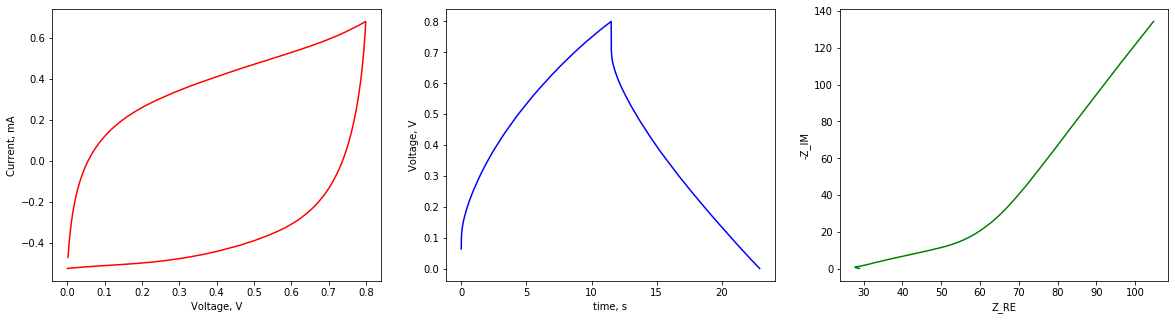

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# import files & define parameters

data_CV = pd.read_csv('Temp_data\[P2-7] total test at day32 -Resin_02_CV.mpt', header=52, sep = "\t")
data_GCD = pd.read_csv('Temp_data\[P2-7] total test at day32 -Resin_03_CP.mpt', header = 48, sep = "\t", encoding ='latin1')
data_EIS = pd.read_csv('Temp_data\[P2-7] total test at day32 -Resin_01_PEIS.mpt', header = 58, sep = "\t", encoding ='latin1')

cycle_CV = 5
cycle_GCD = 5
mass = 0.001371
scan_rate = 20
Vmax = 0.8
current_GCD = 0.001


# column and row filtering & export

data_CV = data_CV[data_CV['cycle number'] == cycle_CV + 1]
data_CV = data_CV[['Ewe/V','<I>/mA']]

data_GCD = data_GCD[data_GCD['cycle number'] == cycle_GCD]
Q_disc = data_GCD['dQ/C'].min()
data_GCD = data_GCD[['time/s', 'Ewe/V']]
time_min = data_GCD['time/s'].min()
data_GCD['time/s'] = data_GCD['time/s'] - time_min

data_EIS = data_EIS[data_EIS['-Im(Z)/Ohm'] > 0]
data_EIS = data_EIS[['freq/Hz', 'Re(Z)/Ohm', '-Im(Z)/Ohm']]

data_CV.to_csv('Filtered_data\CV_filtered.csv', index=False, header=False)
data_GCD.to_csv('Filtered_data\GCD_filtered.csv', index = False, header = False)
data_EIS.to_csv('Filtered_data\EIS_filtered.csv', index = False, header = False)


# CV - Csp & ESR calculation from CV and GCD

data_CV['delta_x'] = data_CV['Ewe/V'].diff()
data_CV['segment_area'] = data_CV['delta_x'] * data_CV['<I>/mA']
VI_area = data_CV['segment_area'].sum(axis=0)
C_sp_CV = 4 * 0.5 * VI_area / mass / scan_rate / Vmax
print('Csp from CV : ', C_sp_CV, '[F/g]')

C_sp_GCD = 4 * -Q_disc / 0.8 / mass
print('Csp from GCD : ', C_sp_GCD, '[F/g]')

data_GCD['delta_V'] = data_GCD['Ewe/V'].diff()
IR_drop = data_GCD['delta_V'].min()
ESR = -IR_drop / current_GCD
print('ESR is : ', ESR, '[Ohm]')


# plot

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize = (20, 5))

axs1.plot(data_CV['Ewe/V'], data_CV['<I>/mA'], 'red')
axs1.set_xlabel('Voltage, V')
axs1.set_ylabel('Current, mA')

axs2.plot(data_GCD['time/s'], data_GCD['Ewe/V'], 'blue')
axs2.set_xlabel('time, s')
axs2.set_ylabel('Voltage, V')

axs3.plot(data_EIS['Re(Z)/Ohm'], data_EIS['-Im(Z)/Ohm'], 'green')
axs3.set_xlabel('Z_RE')
axs3.set_ylabel('-Z_IM')
